In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('practice_data.xlsx')

In [3]:
df.head(9)

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes
5,6,Male,Sales,21,High,Yes,95,8,8,89988,No
6,7,Female,Marketing,24,Low,No,70,5,4,70934,Yes
7,8,Male,Human Resources,18,Medium,Yes,80,6,6,96578,No
8,9,Male,Engineering,20,High,Yes,90,8,7,74219,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   EmployeeID                     31 non-null     int64 
 1   gender                         31 non-null     object
 2   department                     31 non-null     object
 3   Days Present                   31 non-null     int64 
 4   Accuracy of Work               31 non-null     object
 5   Meeting Project Deadlines      31 non-null     object
 6   Task Completion Rates          31 non-null     int64 
 7   Interpersonal Skills Rating    31 non-null     int64 
 8   Decision-Making Skills Rating  31 non-null     int64 
 9   Sales Revenue Generated        31 non-null     int64 
 10  churned                        31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [5]:
df.describe()

,EmployeeID,Days Present,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,16.000000,21.322581,77.258065,6.967742,6.354839,75115.741935
std,9.092121,2.286002,9.204954,1.224306,1.330373,14562.137641
min,1.000000,18.000000,60.000000,5.000000,4.000000,51638.000000
25%,8.500000,19.500000,70.000000,6.000000,5.500000,63065.000000
50%,16.000000,21.000000,80.000000,7.000000,7.000000,75795.000000
75%,23.500000,23.000000,85.000000,8.000000,7.000000,86373.000000
max,31.000000,25.000000,95.000000,9.000000,8.000000,97797.000000


P value: 0.11875345489634448


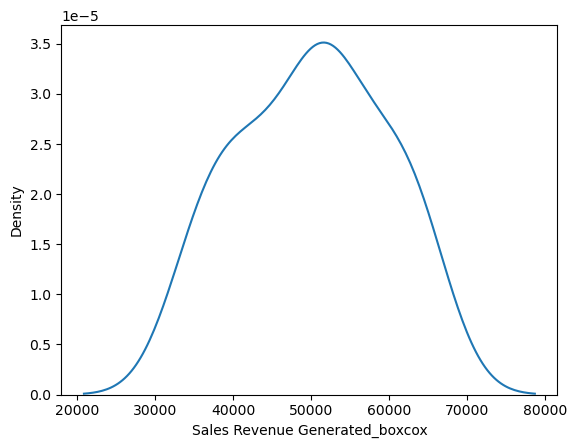

In [6]:
column_name = df['Sales Revenue Generated']

def boxcox_transformation(df, column_name):
    transformed_data, _ = boxcox(df[column_name])
    df[f'{column_name}_boxcox'] = transformed_data


    stat, p_value = shapiro(df[f'{column_name}_boxcox'])
    
    kdeplot = sns.kdeplot(df[f'{column_name}_boxcox'])
    
    print('P value:', p_value)

boxcox_transformation(df, 'Sales Revenue Generated')

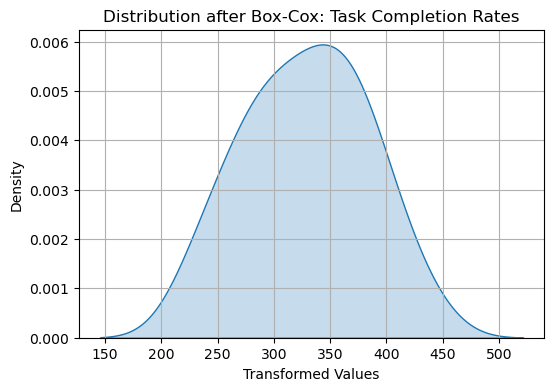

Shapiro-wilk p-value:  0.3471811908413127


In [7]:
# Add extra some function to find a boxcox.

column_name = df['Task Completion Rates']

def boxcox_transformation(df, column_name):
    transformed_data,_ = boxcox(df[column_name])
    df[f'{column_name}_boxcox'] = transformed_data
    
    stat, p_value = shapiro(df[f'{column_name}_boxcox'])

    plt.figure(figsize = (6,4))
    kdeplot = sns.kdeplot(df[f'{column_name}_boxcox'], fill = True)
    plt.title(f'Distribution after Box-Cox: {column_name}')
    plt.xlabel('Transformed Values')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()
    
    print('Shapiro-wilk p-value: ' ,p_value)
    
boxcox_transformation(df, 'Task Completion Rates')

In [8]:
df.head()

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned,Sales Revenue Generated_boxcox,Task Completion Rates_boxcox
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No,34964.489643,374.513519
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes,64563.949080,406.049290
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No,63006.032009,343.732940
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No,60760.864871,313.734992
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes,43127.101767,374.513519


Axes(0.125,0.11;0.775x0.77)
P value: 0.014844538165733686


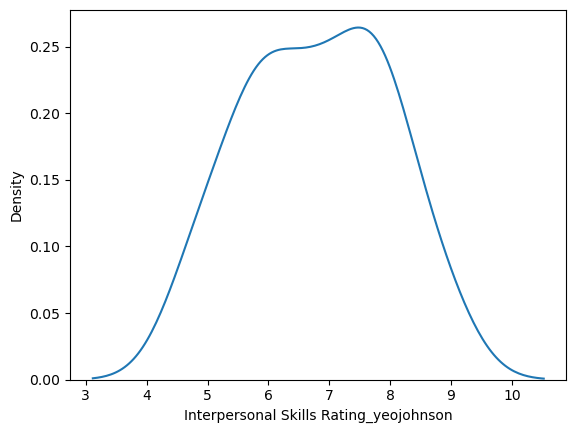

In [9]:
column_name = df['Interpersonal Skills Rating']

def yeojohnson_transformation(df, column_name):
    transformed_data,_ = yeojohnson(df[column_name])
    df[f'{column_name}_yeojohnson'] = transformed_data
    stat, p_value = shapiro(df[f'{column_name}_yeojohnson'])
    kdeplot = sns.kdeplot(df[f'{column_name}_yeojohnson'])
    print(kdeplot)
    print('P value:',p_value)

yeojohnson_transformation(df, 'Interpersonal Skills Rating')

In [13]:
hypothesis_mean = 68
print("Mean: ", hypothesis_mean)

t_statistics, p_value = stats.ttest_1samp(df['Interpersonal Skills Rating'], hypothesis_mean)
print("P-value:", p_value)

alpha = 0.05
if p_value > alpha:
     print("Reject the null hypothesis. There is a significant difference between the average purchase amount and", hypothesis_mean)
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the average purchase amount and", hypothesis_mean)

Mean:  68
P-value: 1.0318380146847296e-52
Fail to reject the null hypothesis. There is no significant difference between the average purchase amount and 68


In [14]:
hypothesis_mean = df['Interpersonal Skills Rating'].mean()
print("Mean: ", hypothesis_mean)

t_statistics, p_value = stats.ttest_1samp(df['Interpersonal Skills Rating'], hypothesis_mean)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
     print("Reject the null hypothesis. There is a significant difference between the average purchase amount and", hypothesis_mean)
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the average purchase amount and", hypothesis_mean)

Mean:  6.967741935483871
P-value: 1.0
Fail to reject the null hypothesis. There is no significant difference between the average purchase amount and 6.967741935483871


In [15]:
churned = df.query('churned == "Yes"')['Sales Revenue Generated']
existing = df.query('churned == "No"')['Sales Revenue Generated']

t_statistic, p_value = stats.ttest_ind(churned, existing, equal_var=False) 

# Significance level
alpha = 0.05

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Decision
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in average purchase amount between churned and existing customers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average purchase amount between churned and existing customers.")


T-statistic: 0.6042785459584843
P-value: 0.5504064751595374
Fail to reject the null hypothesis. There is no significant difference in average purchase amount between churned and existing customers.


In [16]:
data1 = {'Customer_id':[1,2,3,4],
         'City': ['Chicago','New_York','Houston','Los_angeles'],
         'Frequency_of_purchases':[2,4,6,8]}

data1 = pd.DataFrame(data1)

Chicago = data1.query('City == "Chicago"')['Frequency_of_purchases']
New_York = data1.query('City == "New_York"')['Frequency_of_purchases']
Houston = data1.query('City == "Houston"')['Frequency_of_purchases']
Los_angeles = data1.query('City == "Los_angeles"')['Frequency_of_purchases']

f_statistic, p_value = stats.f_oneway(Chicago, New_York, Houston, Los_angeles)

print("F-statistic:", f_statistic)
print("P-value:", p_value)


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average frequency of purchases among the customers from different cities.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average frequency of purchases among the customers from different cities.")


F-statistic: nan
P-value: nan
Fail to reject the null hypothesis. There is no significant difference in average frequency of purchases among the customers from different cities.


In [17]:
Finance = df.query('department=="Finance"')["Sales Revenue Generated"]
Sales = df.query('department=="Sales"')['Sales Revenue Generated']
Marketing = df.query('department=="Marketing"')['Sales Revenue Generated']
Human_Resources = df.query('department=="Human Resources"')['Sales Revenue Generated']
Engineering = df.query('department=="Engineering"')['Sales Revenue Generated']
t_static,p_value=stats.f_oneway(Finance,Sales,Marketing,Human_Resources,Engineering)
print('p_value',p_value)
alpha = 0.05
if p_value<alpha:
    print("Reject the null hypothesis. there is a significant difference in average frequency of purchase among the customers from different cities")
else:
        print("Fail to reject null hyporhesis. there is no significant difference in average frequency of purchase among the customers from different cities")

p_value 0.8947071127613276
Fail to reject null hyporhesis. there is no significant difference in average frequency of purchase among the customers from different cities
